# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# q1 #

df = pd.read_csv('./cars_hw.csv')
df0 = df
df.head(10)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
5,6,Hyundai,2016,red,hatchback,52261,1st,5,petrol,5-Speed,Manual,604000
6,7,Honda,2012,grey,hatchback,28108,2nd,5,petrol,5-Speed,Manual,316000
7,8,Tata,2019,grey,suv,92603,1st,5,diesel,6-Speed,Automatic,1419000
8,9,Hyundai,2021,blue,hatchback,16304,1st,5,petrol,5-Speed,Manual,710000
9,10,Renault,2019,bronze,hatchback,26350,2nd,5,petrol,5-Speed,Manual,392000


In [6]:
df['Price_arcs'] = np.arcsinh(df['Price'])
df['Age'] = max(df['Make_Year']) - df['Make_Year']
df['Mileage_arcs'] = np.arcsinh(df['Mileage_Run'])
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis = 1)

df.loc[:,['Price_arcs', 'Make']].groupby('Make').describe()

Price_arcs                                             \
                   count       mean       std        min        25%   
Make                                                                  
Chevrolet            6.0  13.613042  0.480975  13.188151  13.261539   
Datsun               3.0  13.269194  0.036311  13.232114  13.251449   
Ford                52.0  14.161427  0.210895  13.270783  14.054527   
Honda               73.0  14.229465  0.336972  13.356645  13.965653   
Hyundai            305.0  14.061658  0.398781  13.114331  13.785051   
Jeep                 4.0  14.909738  0.105084  14.763300  14.876417   
Kia                  8.0  14.985324  0.076877  14.822738  14.965389   
MG Motors           35.0  15.132199  0.066263  14.971763  15.088892   
Mahindra            18.0  14.592100  0.159906  14.280502  14.544955   
Maruti Suzuki      293.0  13.911280  0.371409  13.068963  13.619496   
Nissan               4.0  14.334341  0.392610  13.764217  14.230922   
Renault             68.0  14.044009  0.331717  13.260385  13.764211   
Skoda                5.0  14.334011  0.827046  13.678545  13.745088   
Tata                23.0  14.406552  0.615090  12.837344  14.259530   
Toyota              50.0  14.228654  0.360112  13.508985  13.864561   
Volkswagen          29.0  13.987889  0.203839  13.597355  13.896168   

                                                
                     50%        75%        max  
Make                                            
Chevrolet      13.445433  13.864828  14.394369  
Datsun         13.270783  13.287734  13.304685  
Ford           14.162640  14.269131  14.572571  
Honda          14.266586  14.419827  14.938490  
Hyundai        14.059241  14.330727  15.063692  
Jeep           14.933413  14.966733  15.008827  
Kia            14.996253  15.042662  15.063117  
MG Motors      15.122762  15.190744  15.211260  
Mahindra       14.598828  14.654396  14.890513  
Maruti Suzuki  13.868103  14.239470  14.659661  
Nissan         14.481870  14.585290  14.609408  
Renault        14.068542  14.286754  14.660520  
Skoda          13.888761  14.770252  15.587407  
Tata           14.368246  14.944517  15.250595  
Toyota         14.396608  14.531374  14.596669  
Volkswagen     14.009431  14.150553  14.272935

<Axes: xlabel='Price_arcs', ylabel='Density'>

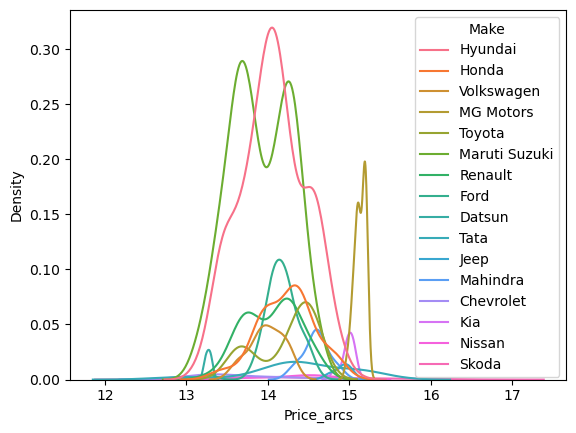

In [22]:
sns.kdeplot(data = df, x = 'Price_arcs', hue = 'Make')

In [8]:
df.loc[:,['Age', 'Mileage_arcs']].groupby('Age').describe()

Mileage_arcs                                                        \
           count       mean       std        min        25%        50%   
Age                                                                      
0           14.0   9.404678  0.662803   8.032685   8.973387   9.384119   
1           69.0  10.129520  0.720722   7.711549   9.665357  10.109281   
2          135.0  10.649222  0.604819   9.068085  10.234347  10.793845   
3          124.0  10.727452  0.605807   8.377471  10.414655  10.783964   
4          112.0  11.073674  0.557760   9.488427  10.759420  11.076331   
5          137.0  11.319947  0.499425   9.641733  11.015542  11.380194   
6           92.0  11.570243  0.522757   9.254740  11.260178  11.603479   
7           85.0  11.517178  0.470081   9.301095  11.300672  11.586306   
8           73.0  11.618738  0.418736   9.652330  11.409341  11.699023   
9           53.0  11.454765  0.516922   9.966556  11.110655  11.536388   
10          38.0  11.580458  0.343792  10.746218  11.343323  11.533647   
11          44.0  11.693698  0.313558  10.377296  11.513105  11.673996   

                           
           75%        max  
Age                        
0     9.938210  10.583245  
1    10.441150  11.631153  
2    11.085337  11.852892  
3    11.043306  12.129224  
4    11.499907  12.123973  
5    11.696063  12.163812  
6    12.058428  12.201010  
7    11.856799  12.196032  
8    11.913847  12.186982  
9    11.882501  12.158782  
10   11.804928  12.201010  
11   11.917850  12.174984

<Axes: xlabel='Mileage_arcs', ylabel='Density'>

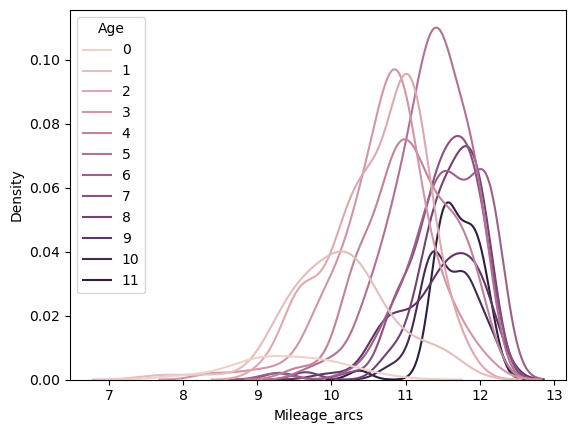

In [23]:
sns.kdeplot(data = df, x = 'Mileage_arcs', hue = 'Age')

In [9]:
# q2 #

from sklearn import linear_model

X = pd.get_dummies(df['Make'], dtype = 'int')
Y = df['Price_arcs']
regress = linear_model.LinearRegression(fit_intercept = False).fit(X, Y)

results = pd.DataFrame({'vars':regress.feature_names_in_, 'coeffs':regress.coef_})
results

,vars,coeffs
0,Chevrolet,13.613042
1,Datsun,13.269194
2,Ford,14.161427
3,Honda,14.229465
4,Hyundai,14.061658
5,Jeep,14.909738
6,Kia,14.985324
7,MG Motors,15.132199
8,Mahindra,14.592100
9,Maruti Suzuki,13.911280


In [10]:
from sklearn import linear_model

X = pd.get_dummies(df['Body_Type'], dtype = 'int')
Y = df['Price_arcs']
regress = linear_model.LinearRegression(fit_intercept = False).fit(X, Y)

results = pd.DataFrame({'vars':regress.feature_names_in_, 'coeffs':regress.coef_})
results

,vars,coeffs
0,crossover,14.154329
1,hatchback,13.828447
2,muv,13.997345
3,sedan,14.244321
4,suv,14.612189


In [24]:
# q3 #

N = df.shape[0]
df = df.sample(frac = 1, random_state = 100)
train_size = int(0.8 * N)

df_train = df[0:train_size]
Y_train = df_train['Price_arcs']

df_test = df[train_size:]
Y_test = df_test['Price_arcs']

In [12]:
# q4 #

# numerical # 
var_n = ['Age', 'Mileage_arcs', 'Seating_Capacity']
X_train_n = df_train.loc[:, var_n]
regress_n = linear_model.LinearRegression().fit(X_train_n, Y_train)

X_test_n = df_test.loc[:, var_n]
Y_hat = regress_n.predict(X_test_n)
print('numeric R^2:', regress_n.score(X_test_n, Y_test))
rmse_n = np.sqrt(np.mean((Y_test - Y_hat) ** 2))
print('numeric RMSE:', rmse_n)

numeric R^2: 0.45254262356326824
numeric RMSE: 0.3339265473590646


In [14]:
# categorical #
var_cat = ['Make', 'Color', 'Fuel_Type', 'Transmission', 'Transmission_Type']

dummies = pd.DataFrame([])
for var in var_cat: 
    new_dummies = pd.get_dummies(df.loc[:,var], drop_first = True, dtype = int)
    dummies = pd.concat([dummies, new_dummies], axis = 1, ignore_index = True) 
    X_train_c = dummies.iloc[0:train_size, :]
    X_test_c = dummies.iloc[train_size:, :]
regress_c = linear_model.LinearRegression().fit(X_train_c, Y_train)
Y_hat_c = regress_c.predict(X_test_c)
print('categorical R^2:', regress_c.score(X_test_c, Y_test))
rmse_c = np.sqrt(np.mean((Y_test - Y_hat_c) ** 2))
print('categorical RMSE:', rmse_c)

categorical R^2: 0.5247792718768994
categorical RMSE: 0.3111168112223766


In [15]:
# combined #
X_train_all = pd.concat([X_train_n, X_train_c], axis = 1, ignore_index = True)
X_test_all = pd.concat([X_test_n, X_test_c], axis = 1, ignore_index = True)

regress_all = linear_model.LinearRegression().fit(X_train_all, Y_train)
Y_hat_all = regress_all.predict(X_test_all)
print('R^2:', regress_all.score(X_test_all, Y_test))
rmse_all = np.sqrt(np.mean((Y_test - Y_hat_all) ** 2))
print('RMSE:', rmse_all)

R^2: 0.716519311528547
RMSE: 0.2402910142819655


combined model best bc highest R^2 b/w training and test and lowest RMSE out of all 3

In [16]:
# q5 #

from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1, 5):
    expander = PolynomialFeatures(degree = d, include_bias = False)

    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out()
    X_test_d = pd.DataFrame(data = Z, columns = names)
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out()
    X_train_d = pd.DataFrame(data = Z, columns = names)
    X_train_d.reset_index(drop = True, inplace = True)
    X_train_c.reset_index(drop = True, inplace = True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis = 1, ignore_index = True)

    X_test_d.reset_index(drop = True, inplace = True)
    X_test_c.reset_index(drop = True, inplace = True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis = 1, ignore_index = True)

    regress_all = linear_model.LinearRegression().fit(X_train_all, Y_train)
    print(d, 'R^2:', regress_all.score(X_test_all, Y_test))
    Y_hat_all = regress_all.predict(X_test_all)
    rmse_all = np.sqrt(np.mean((Y_test - Y_hat_all) ** 2))
    print(d, 'RMSE:', rmse_all)

1 R^2: 0.716519311528547
1 RMSE: 0.2402910142819655
2 R^2: 0.7336546292526143
2 RMSE: 0.2329154875615433
3 R^2: 0.7362770415718722
3 RMSE: 0.23176601880785058
4 R^2: -47792438235.78854
4 RMSE: 98663.24268659398


<Axes: xlabel='Price_arcs'>

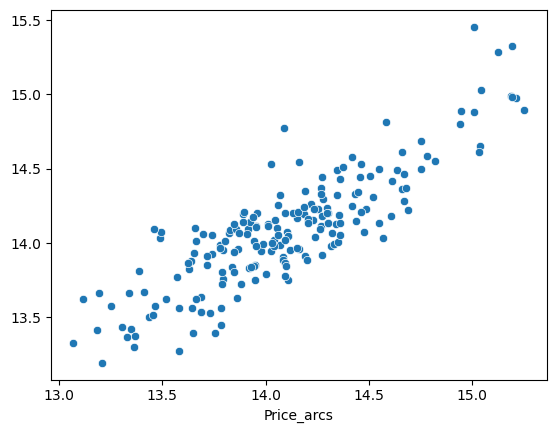

In [17]:
d = 3
expander = PolynomialFeatures(degree = d, include_bias = False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out()
X_test_d = pd.DataFrame(data = Z, columns = names)

Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out()
X_train_d = pd.DataFrame(data = Z, columns = names)

X_train_d.reset_index(drop = True, inplace = True)
X_train_c.reset_index(drop = True, inplace = True)
X_train_all = pd.concat([X_train_d, X_train_c], axis = 1)
X_train_all.columns = X_train_all.columns.astype(str)

X_test_d.reset_index(drop = True, inplace = True)
X_test_c.reset_index(drop = True, inplace = True)
X_test_all = pd.concat([X_test_d, X_test_c], axis = 1)
X_test_all.columns = X_test_all.columns.astype(str)

regress_all = linear_model.LinearRegression().fit(X_train_all, Y_train)

Y_hat_all = regress_all.predict(X_test_all)
residuals = Y_test - Y_hat_all

sns.scatterplot(x = Y_test, y = Y_hat_all)

<Axes: xlabel='Price_arcs', ylabel='Density'>

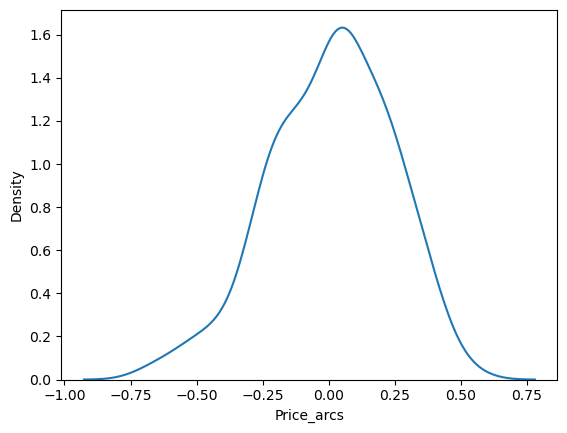

In [18]:
sns.kdeplot(residuals)

q6.

q1. insights on certain vars influencing others like Price_arcs - distribs made and relationships ID'd
q2. one-hot encoding transformation for categorical variables for the regression
q3. 80/20 test train split made 
q4. simple linear regression models made to eval numerical and categorical data separately and then together, finding that the combined model gave a better r^2 val 
q5. more complex model built from adding polynomial features and fitting models with increasing degrees; showed that performance increased up to degree 3 peak then declined immensely at degree 4 (overfitting). simple models were good baseline, but some underfitting from high rmse, and overfitting from complex models with higher polynomial degrees polynomial – need to balance simplicity/complexity to avoid overfitting while still being able to ID key patterns/trends/observations